In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt

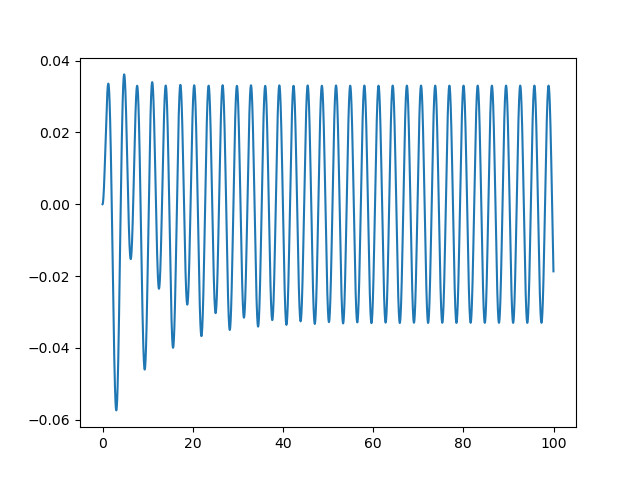

In [32]:
# define the differential equation
def f(r, t): # don't forget r is a vector!
    x = r[0]
    v = r[1]
    k = 1
    m = 1
    gamma = 0.2
    fx = v  # this is the dx/dt equation!
    fv = -k/m*x -gamma*v + 0.1*np.cos(2*t) # this is the second derivative equation! 
    return(np.array([fx, fv]))

# define the boundary condition
a = 0.0
b = 100
N = 5000
dt = (b-a)/N

# Runge-Kutta 4th order

r = np.array([0.0, 0.0]) # initial condition

tpoints = np.arange(a, b, dt)

xpoints = []
vpoints = []

for i in tpoints:
    xpoints.append(r[0])
    vpoints.append(r[1])
    k1 = dt*f(r, i)
    k2 = dt*f(r+1/2*k1, i+1/2*dt)
    k3 = dt*f(r+1/2*k2, i+1/2*dt)
    k4 = dt*f(r+k3, i+dt)
    r = r + (k1+2*k2+2*k3+k4)/6

fig0, ax0 = plt.subplots()
ax0.plot(tpoints, xpoints)
# ax0.plot(tpoints, vpoints)

In [34]:
import time
import numpy as np

# simple rk4 step
def rk4_step(f, r, t, dt):
    k1 = dt*f(r, t)
    k2 = dt*f(r + 0.5*k1, t + 0.5*dt)
    k3 = dt*f(r + 0.5*k2, t + 0.5*dt)
    k4 = dt*f(r + k3,     t + dt)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6

# differential equation
def f(r, t):
    x, v = r
    k = 1.0
    m = 1.0
    dxdt = v
    dvdt = -k/m*x + 0.1*np.cos(2*t)
    return np.array([dxdt, dvdt])

def run_list(N=200_000):
    a = 0.0
    b = 50.0
    dt = (b-a)/N
    tpoints = np.linspace(a, b, N, endpoint=False)

    r = np.array([0.0, 0.0])
    xpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        r = rk4_step(f, r, t, dt)

    return xpoints

def run_numpy(N=200_000):
    a = 0.0
    b = 50.0
    dt = (b-a)/N
    tpoints = np.linspace(a, b, N, endpoint=False)

    r = np.array([0.0, 0.0])
    x = np.empty(N)

    for i, t in enumerate(tpoints):
        x[i] = r[0]
        r = rk4_step(f, r, t, dt)

    return x

# timing
def time_function(func, repeats=3):
    times = []
    for _ in range(repeats):
        start = time.perf_counter()
        func()
        end = time.perf_counter()
        times.append(end - start)
    return min(times)

N = 600_000

t_list = time_function(lambda: run_list(N))
t_numpy = time_function(lambda: run_numpy(N))

print(f"N = {N}")
print(f"list append time:  {t_list:.4f} s")
print(f"numpy prealloc time: {t_numpy:.4f} s")
print(f"speedup factor: {t_list/t_numpy:.2f}x")


N = 600000
list append time:  7.7402 s
numpy prealloc time: 7.9348 s
speedup factor: 0.98x


In [ ]:
# define the differential equation
def f(r, t): # don't forget r is a vector!
    x = r[0]
    v = r[1]
    k = 1
    m = 1
    gamma = 0.2
    fx = v  # this is the dx/dt equation!
    fv = -k/m*x -gamma*v + 0.1*np.cos(2*t) # this is the second derivative equation! 
    return([fx, fv])

# define the boundary condition
a = 0.0
b = 100
N = 5000
dt = (b-a)/N

# Runge-Kutta 4th order

r = [0.0, 0.0] # initial condition

tpoints = np.arange(a, b, dt)

xpoints = []
vpoints = []

for i in tpoints:
    xpoints.append(r[0])
    vpoints.append(r[1])
    k1 = dt*f(r, i)
    k2 = dt*f(r+1/2*k1, i+1/2*dt)
    k3 = dt*f(r+1/2*k2, i+1/2*dt)
    k4 = dt*f(r+k3, i+dt)
    r = r + (k1+2*k2+2*k3+k4)/6

fig0, ax0 = plt.subplots()
ax0.plot(tpoints, xpoints)
# ax0.plot(tpoints, vpoints)

In [35]:
# ----------------------------
# timing helper
# ----------------------------
def time_function(func, repeats=5):
    times = []
    for _ in range(repeats):
        t0 = time.perf_counter()
        func()
        t1 = time.perf_counter()
        times.append(t1 - t0)
    return min(times), sum(times)/len(times)

# ----------------------------
# common params
# ----------------------------
a = 0.0
b = 100.0
N = 600_000  # change this
dt = (b - a) / N
tpoints = np.linspace(a, b, N, endpoint=False)

k = 1.0
m = 1.0
gamma = 0.2
F0 = 0.1
omega = 2.0

# ----------------------------
# (1) vector rk4, f returns np.array (your original style)
# ----------------------------
def f_vec(r, t):
    x, v = r[0], r[1]
    fx = v
    fv = -(k/m)*x - gamma*v + F0*np.cos(omega*t)
    return np.array([fx, fv])  # alloc every call

def rk4_step_vec(r, t):
    k1 = dt * f_vec(r, t)
    k2 = dt * f_vec(r + 0.5*k1, t + 0.5*dt)
    k3 = dt * f_vec(r + 0.5*k2, t + 0.5*dt)
    k4 = dt * f_vec(r + k3,     t + dt)
    return r + (k1 + 2*k2 + 2*k3 + k4)/6.0

def run_vec_list():
    r = np.array([0.0, 0.0])
    xs = []
    for t in tpoints:
        xs.append(r[0])
        r = rk4_step_vec(r, t)
    return xs

def run_vec_prealloc():
    r = np.array([0.0, 0.0])
    xs = np.empty(N)
    for i, t in enumerate(tpoints):
        xs[i] = r[0]
        r = rk4_step_vec(r, t)
    return xs

# ----------------------------
# (2) scalar rk4, no per-step numpy arrays (this is the "take it out" version that actually works)
# ----------------------------
def accel(x, v, t):
    return -(k/m)*x - gamma*v + F0*np.cos(omega*t)

def rk4_step_scalar(x, v, t):
    # system: x' = v, v' = a(x,v,t)
    k1x = v
    k1v = accel(x, v, t)

    x2  = x + 0.5*dt*k1x
    v2  = v + 0.5*dt*k1v
    t2  = t + 0.5*dt
    k2x = v2
    k2v = accel(x2, v2, t2)

    x3  = x + 0.5*dt*k2x
    v3  = v + 0.5*dt*k2v
    k3x = v3
    k3v = accel(x3, v3, t2)

    x4  = x + dt*k3x
    v4  = v + dt*k3v
    t4  = t + dt
    k4x = v4
    k4v = accel(x4, v4, t4)

    x_new = x + (dt/6.0)*(k1x + 2*k2x + 2*k3x + k4x)
    v_new = v + (dt/6.0)*(k1v + 2*k2v + 2*k3v + k4v)
    return x_new, v_new

def run_scalar_list():
    x, v = 0.0, 0.0
    xs = []
    for t in tpoints:
        xs.append(x)
        x, v = rk4_step_scalar(x, v, t)
    return xs

def run_scalar_prealloc():
    x, v = 0.0, 0.0
    xs = np.empty(N)
    for i, t in enumerate(tpoints):
        xs[i] = x
        x, v = rk4_step_scalar(x, v, t)
    return xs

# ----------------------------
# run benchmarks
# ----------------------------
bench = [
    ("vec + list", run_vec_list),
    ("vec + prealloc", run_vec_prealloc),
    ("scalar + list", run_scalar_list),
    ("scalar + prealloc", run_scalar_prealloc),
]

print(f"N={N}, dt={dt:g}")
for name, fn in bench:
    tmin, tavg = time_function(fn, repeats=3)
    print(f"{name:16s}  min {tmin:8.3f} s   avg {tavg:8.3f} s")


N=600000, dt=0.000166667
vec + list        min    6.916 s   avg    6.948 s
vec + prealloc    min    7.124 s   avg    7.170 s
scalar + list     min    2.066 s   avg    2.069 s
scalar + prealloc  min    2.042 s   avg    2.052 s


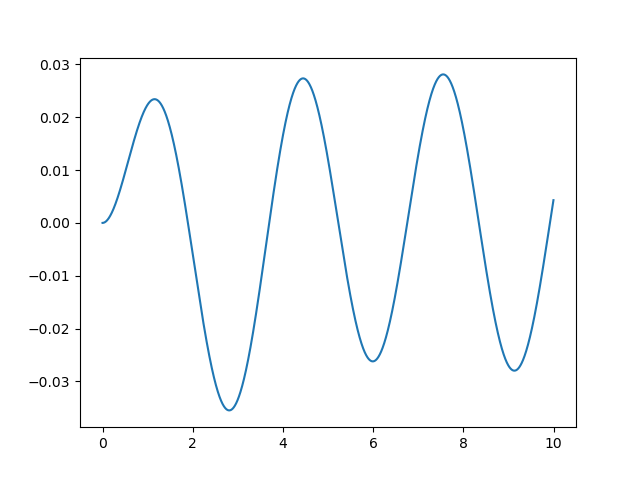

In [40]:
# scalar differential equation pieces
def accel(x, v, t):
    k = 1.0
    m = 1.0
    gamma = 1.0
    return -(k/m)*x - gamma*v + 0.1*np.cos(2.0*t)  # v' = a(x,v,t)

# boundary / timestep
a = 0.0
b = 10.0
N = 5000
dt = (b - a) / N

tpoints = np.arange(a, b, dt)

# initial conditions (scalar)
x = 0.0
v = 0.0

xpoints = []
vpoints = []

# rk4 loop (scalar)
for t in tpoints:
    xpoints.append(x)
    vpoints.append(v)

    k1x = v
    k1v = accel(x, v, t)

    x2 = x + 0.5*dt*k1x
    v2 = v + 0.5*dt*k1v
    t2 = t + 0.5*dt
    k2x = v2
    k2v = accel(x2, v2, t2)

    x3 = x + 0.5*dt*k2x
    v3 = v + 0.5*dt*k2v
    k3x = v3
    k3v = accel(x3, v3, t2)

    x4 = x + dt*k3x
    v4 = v + dt*k3v
    t4 = t + dt
    k4x = v4
    k4v = accel(x4, v4, t4)

    x = x + (dt/6.0)*(k1x + 2*k2x + 2*k3x + k4x)
    v = v + (dt/6.0)*(k1v + 2*k2v + 2*k3v + k4v)

fig0, ax0 = plt.subplots()
ax0.plot(tpoints, xpoints)